In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from datetime import datetime
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
%matplotlib inline

# 处理数据

In [28]:
# 查看数据格式
dataset_1 = pd.read_csv('pollution.csv', header=0, )
dataset_1

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [29]:
# 将数据的columns 时间整理好
def parse(x):
    return datetime.strptime(x,'%Y %m %d %H')

dataset_2 = pd.read_csv('pollution.csv',header=0, parse_dates=[['year','month', 'day', 'hour']],date_parser=parse) 
dataset_2

,year_month_day_hour,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014-12-31 22:00:00,43823,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [30]:
dataset_2.set_index('year_month_day_hour', inplace = True)
dataset_2

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [31]:
dataset_2.index_name='date'
dataset_2.drop('No',axis=1,inplace=True)

In [32]:
dataset_2.columns = ['Pollution', 'Dwmp', 'Temp', 'Press', 'Cbwd', 'Lws','Ls','Lr']
dataset_2

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [33]:
# 删掉Pollution为nan的
dataset_2.dropna(axis=0,subset=['Pollution'])

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [34]:
dataset_2.to_csv('pollution_2.csv')

In [35]:
data = pd.read_csv('pollution_2.csv', header = 0, index_col = 0)
data.head()

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [36]:
data.index.name='date'
data.head()

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [37]:
# 对 第五列 进行编码
CbwdMap = {elem: index+1 for index, elem in enumerate(set(data['Cbwd']))}
data['Cbwd'] = data['Cbwd'].map(CbwdMap)
data

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


In [38]:
# 删掉POllution为Nan的行
data.dropna(axis=0, subset=['Pollution'],inplace=True)
data

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,4,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,4,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,4,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,4,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,4,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,1,242.70,0,0


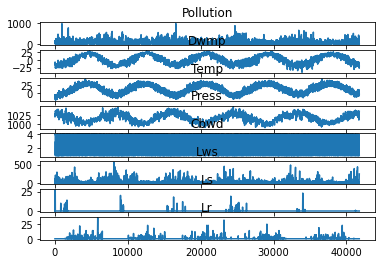

In [39]:
#绘制图表
plt.figure()
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1,i+1)
    plt.plot(data.values[:,i])
    plt.title(data.columns[i])

# 为LSTM准备数据

In [40]:
# 将时序数据转换为  可输入到LSTM的数据
def series_to_Lstm(data, n_in, n_out):
    # 原则上可以合并
    column_x = []   #存放 前几个变量
    column_y=[]   # 存放 要预测的 Pollution
    
    name_in = []
    name_y = []
    #变量的名字
    n_var = len(data.columns)
    
    # 将变量部分 加到column_x里面
    for i in range(n_in,0,-1):
        column_x.append(data.shift(periods=i, axis=0))
        name_in += ['Var'+str(k+1) + '(t-' + str(i) + ')' for k in range(n_var)]
    # 将结果Pollution 加到 column_y里面
    for i in range(n_out):
        column_x.append(data['Pollution'].shift(periods=-i))
        if i == 0:
            name_y = ['Out(t)'] 
        else:
            name_y += ['Out(t+' + str(i) + ')']
    # 将 变量和结果组合在一起
    data_new = pd.concat(column_x+column_y, axis=1)
    data_new.columns = name_in + name_y
    data_new.dropna(thresh=n_in*8, axis=0, inplace=True) #thresh=n_in*8  保留至少有 n_in*8 个非空值的行
    return data_new

In [92]:
## test 不要执行！！！

cc = []
a = data.shift(2)
cc.append(a)

a = data.shift(1)
cc.append(a)

a = data['Pollution'].shift(0)
cc.append(a)

a = data['Pollution'].shift(-1)
cc.append(a)


acc = pd.concat(cc, axis=1)
acc.head(10)

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr,Pollution,Pollution
date,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,148.0
2010-01-02 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,-16.0,-4.0,1020.0,4.0,1.79,0.0,0.0,148.0,159.0
2010-01-02 02:00:00,129.0,-16.0,-4.0,1020.0,4.0,1.79,0.0,0.0,148.0,-15.0,-4.0,1020.0,4.0,2.68,0.0,0.0,159.0,181.0
2010-01-02 03:00:00,148.0,-15.0,-4.0,1020.0,4.0,2.68,0.0,0.0,159.0,-11.0,-5.0,1021.0,4.0,3.57,0.0,0.0,181.0,138.0
2010-01-02 04:00:00,159.0,-11.0,-5.0,1021.0,4.0,3.57,0.0,0.0,181.0,-7.0,-5.0,1022.0,4.0,5.36,1.0,0.0,138.0,109.0
2010-01-02 05:00:00,181.0,-7.0,-5.0,1022.0,4.0,5.36,1.0,0.0,138.0,-7.0,-5.0,1022.0,4.0,6.25,2.0,0.0,109.0,105.0
2010-01-02 06:00:00,138.0,-7.0,-5.0,1022.0,4.0,6.25,2.0,0.0,109.0,-7.0,-6.0,1022.0,4.0,7.14,3.0,0.0,105.0,124.0
2010-01-02 07:00:00,109.0,-7.0,-6.0,1022.0,4.0,7.14,3.0,0.0,105.0,-7.0,-6.0,1023.0,4.0,8.93,4.0,0.0,124.0,120.0
2010-01-02 08:00:00,105.0,-7.0,-6.0,1023.0,4.0,8.93,4.0,0.0,124.0,-7.0,-5.0,1024.0,4.0,10.72,0.0,0.0,120.0,132.0


In [41]:
data.head()

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,4,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,4,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,4,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,4,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,4,6.25,2,0


In [42]:
# 对data数据max min 归一化 
#  方法1   方法二 用函数 MinMaxScaler() 
data = (data-data.min()) / (data.max() - data.min())
data.head() 

,Pollution,Dwmp,Temp,Press,Cbwd,Lws,Ls,Lr
date,,,,,,,,
2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,1.0,0.002372,0.000000,0.0
2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,1.0,0.003947,0.000000,0.0
2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,1.0,0.005522,0.000000,0.0
2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,1.0,0.008690,0.037037,0.0
2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,1.0,0.010265,0.074074,0.0


In [58]:
n_in = 3
n_out = 1
data_reframe = series_to_Lstm(data, n_in, n_out)
data_reframe.head()

,Var1(t-3),Var2(t-3),Var3(t-3),Var4(t-3),Var5(t-3),Var6(t-3),Var7(t-3),Var8(t-3),Var1(t-2),Var2(t-2),...,Var8(t-2),Var1(t-1),Var2(t-1),Var3(t-1),Var4(t-1),Var5(t-1),Var6(t-1),Var7(t-1),Var8(t-1),Out(t)
date,,,,,,,,,,,,,,,,,,,,,
2010-01-02 03:00:00,0.129779,0.352941,0.245902,0.527273,1.0,0.002372,0.000000,0.0,0.148893,0.367647,...,0.0,0.159960,0.426471,0.229508,0.545455,1.0,0.005522,0.000000,0.0,0.182093
2010-01-02 04:00:00,0.148893,0.367647,0.245902,0.527273,1.0,0.003947,0.000000,0.0,0.159960,0.426471,...,0.0,0.182093,0.485294,0.229508,0.563636,1.0,0.008690,0.037037,0.0,0.138833
2010-01-02 05:00:00,0.159960,0.426471,0.229508,0.545455,1.0,0.005522,0.000000,0.0,0.182093,0.485294,...,0.0,0.138833,0.485294,0.229508,0.563636,1.0,0.010265,0.074074,0.0,0.109658
2010-01-02 06:00:00,0.182093,0.485294,0.229508,0.563636,1.0,0.008690,0.037037,0.0,0.138833,0.485294,...,0.0,0.109658,0.485294,0.213115,0.563636,1.0,0.011840,0.111111,0.0,0.105634
2010-01-02 07:00:00,0.138833,0.485294,0.229508,0.563636,1.0,0.010265,0.074074,0.0,0.109658,0.485294,...,0.0,0.105634,0.485294,0.213115,0.581818,1.0,0.015008,0.148148,0.0,0.124748


## 将训练集 验证集 测试集 分开

In [59]:
data_reframe.shape

(41754, 25)

In [80]:
# 先将训练集和测试集分开 
# 再将 X y分开
# 再将输入维度转为[samples, timesteps, features]

# 或者
# 先将X y 分开
# 再将输入维度转为[samples, timesteps, features]
# 先将训练集和测试集分开 


# 定义 训练集 测试集样本数量
train_num = int(data_set.shape[0]*0.6)
dev_num   = int(data_set.shape[0]*0.2)
test_num  = int(data_set.shape[0]*0.2)  

# 先将训练集和测试集合分开
train_set = data_reframe.values[:train_num, :]
dev_set = data_reframe.values[train_num:train_num+dev_num, :]
test_set = data_reframe.values[train_num+dev_num:, :]
print('训练集：',train_set.shape)
print('测试集：',test_set.shape)
print('验证集：',dev_set.shape)
#将输入输出分开
train_set_x, train_set_y = train_set[:,0:-1],train_set[:, -1]
test_set_x, test_set_y = test_set[:,0:-1],test_set[:, -1]
dev_set_x, dev_set_y = dev_set[:,0:-1],dev_set[:, -1]
# 将数据集 reshape成 LSTM可输入的形状  投入到 LSTM 的 X 需要有这样的结构： [samples, timesteps, features] 在LSTM层中 input_shape=(timesteps,features) 
train_set_x = train_set_x.reshape(train_set_x.shape[0], 3, -1)
test_set_x = test_set_x.reshape(test_set_x.shape[0], 3, -1)
dev_set_x = dev_set_x.reshape(dev_set_x.shape[0], 3, -1)

训练集： (25052, 25)
测试集： (8352, 25)
验证集： (8350, 25)


In [81]:
print('训练集：',train_set_x.shape,train_set_y.shape,)
print('测试集：',test_set_x.shape, test_set_y.shape)
print('验证集：',dev_set_x.shape, dev_set_y.shape)

训练集： (25052, 3, 8) (25052,)
测试集： (8352, 3, 8) (8352,)
验证集： (8350, 3, 8) (8350,)


# 建立LSTM模型

In [82]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_set_x.shape[1], train_set_x.shape[2]), activation='relu', return_sequences=True)) 
model.add(keras.layers.LSTM(20, input_shape=(train_set_x.shape[1], 50), activation='relu', return_sequences=False))      
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
histort = model.fit(train_set_x,train_set_y, epochs=50, batch_size=72,validation_data=(dev_set_x, dev_set_y), verbose=2, shuffle=False)

Train on 25052 samples, validate on 8350 samples
Epoch 1/50
25052/25052 - 7s - loss: 0.0422 - val_loss: 0.0267
Epoch 2/50
25052/25052 - 4s - loss: 0.0225 - val_loss: 0.0264
Epoch 3/50
25052/25052 - 4s - loss: 0.0215 - val_loss: 0.0250
Epoch 4/50
25052/25052 - 4s - loss: 0.0209 - val_loss: 0.0233
Epoch 5/50
25052/25052 - 4s - loss: 0.0203 - val_loss: 0.0213
Epoch 6/50
25052/25052 - 4s - loss: 0.0190 - val_loss: 0.0187
Epoch 7/50
25052/25052 - 4s - loss: 0.0176 - val_loss: 0.0176
Epoch 8/50
25052/25052 - 4s - loss: 0.0158 - val_loss: 0.0157
Epoch 9/50
25052/25052 - 4s - loss: 0.0150 - val_loss: 0.0153
Epoch 10/50
25052/25052 - 4s - loss: 0.0144 - val_loss: 0.0142
Epoch 11/50
25052/25052 - 4s - loss: 0.0141 - val_loss: 0.0140
Epoch 12/50
25052/25052 - 4s - loss: 0.0139 - val_loss: 0.0140
Epoch 13/50
25052/25052 - 4s - loss: 0.0138 - val_loss: 0.0142
Epoch 14/50
25052/25052 - 4s - loss: 0.0138 - val_loss: 0.0143
Epoch 15/50
25052/25052 - 4s - loss: 0.0137 - val_loss: 0.0146
Epoch 16/50
250

In [83]:
model.save('currentlstm.h5')

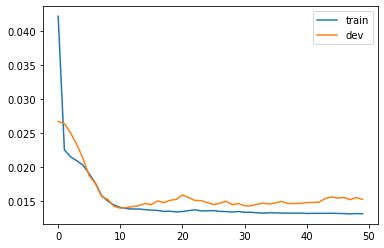

In [84]:
plt.plot(histort.history['loss'],label='train')
plt.plot(histort.history['val_loss'],label='dev')
plt.legend()
plt.show()

In [96]:
# 用test数据集预测
pred_y = model.predict(test_set_x)
print(pred_y.shape)
print(test_set_y.shape)

(8352, 1)
(8352,)


In [97]:
pred_y = pred_y.reshape(pred_y.shape[0],)
print(pred_y.shape)
print(test_set_y.shape)

(8352,)
(8352,)


array([0.11349642, 0.09952816, 0.11100969, 0.04066402, 0.03260838,
       0.06208071, 0.09398023, 0.17333458, 0.17033981, 0.2185928 ,
       0.17012411, 0.14216708, 0.06768862, 0.07120402, 0.11670581,
       0.14011389, 0.13984393, 0.08711343, 0.10233332, 0.09303536,
       0.100104  , 0.11693614, 0.12802447, 0.12662888, 0.12023086,
       0.17330083, 0.20474075, 0.17354043, 0.13612498, 0.08126335,
       0.08259975, 0.06174399, 0.06031009, 0.06131892, 0.04643902,
       0.05373497, 0.04990295, 0.04985401, 0.05228738, 0.0638942 ,
       0.09757286, 0.25366515, 0.4085479 , 0.47919846, 0.49778742,
       0.5144535 , 0.54279   , 0.54248685, 0.6243226 , 0.60432655,
       0.61132056, 0.6272823 , 0.58348036, 0.5694419 , 0.4762683 ,
       0.42368633, 0.43165433, 0.4618573 , 0.43104252, 0.42744634,
       0.2563738 , 0.10622342, 0.26437467, 0.29751042, 0.3178127 ,
       0.35164684, 0.41040212, 0.44973382, 0.4144902 , 0.26595753,
       0.35488015, 0.3537677 , 0.26831365, 0.2903396 , 0.22505

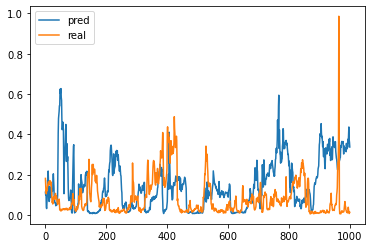

In [103]:
# 绘图
plt.plot(pred_y[:1000], label='pred')
plt.plot(train_set_y[:1000],label='real')
plt.legend()
plt.show()